In [192]:
import pandas as pd
import matplotlib.pyplot as plt

import os
from datetime import datetime

### Read progress and records files

In [193]:
environments = {
    "water_tank": {
        "base_dir": "../../logs/ppo/double_water_tank",
        "tracked_point": "x2",
    },
    "CPAP": {
        "base_dir": "../../logs/ppo/CPAP",
        "tracked_point": "x3",
    },
}

base_dir, tracked_point = environments["water_tank"].values()

index = None # -1
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))][:index]

def folder_to_datetime(folder_name):
    """
    Função para converter o nome da pasta em um objeto datetime
    """
    return datetime.strptime(folder_name, '%d-%m-%H%M')


# Encontrar a pasta com o timestamp mais recente
latest_folder = max(folders, key=folder_to_datetime)

print(f"A pasta mais recente é: {latest_folder}")

A pasta mais recente é: 28-01-0353


In [194]:
progress_df = pd.read_csv(f"{base_dir}/{latest_folder}/progress.csv")
rec_df = pd.read_csv(f"{base_dir}/{latest_folder}/records.csv")

In [195]:
progress_df.head()

,train/policy_gradient_loss,train/entropy_loss,train/std,train/iteration,train/explained_variance,train/loss,train/clip_fraction,train/n_updates,train/clip_range,train/learning_rate,train/approx_kl,train/value_loss
0,0.0,-1.717299,1.349873,1,NaN,-1.714877,0.4960,1000,0.2,0.0003,0.045211,0.189546
1,0.0,-2.017309,1.822156,2,NaN,-2.017633,0.3935,2000,0.2,0.0003,0.032653,0.051688
2,0.0,-2.317299,2.459630,3,NaN,-2.318499,0.6050,3000,0.2,0.0003,0.037728,0.007614
3,0.0,-2.617329,3.320252,4,NaN,-2.618672,0.0000,4000,0.2,0.0003,0.001348,0.000358
4,0.0,-2.917379,4.482095,5,NaN,-2.918729,0.0000,5000,0.2,0.0003,0.001033,0.000002


In [196]:
rec_df

,x1,x2,y_ref,z_t,PID_action,PPO_action,combined_action,reward,error,steps_in_episode,is_start_episode
0,5.042733,3.066942,3.0,0.000000,0.000000,0.0000,-0.066942,-0.002857,-0.053450,1,True
1,4.677271,3.053450,3.0,-0.053450,0.000000,0.6205,0.560357,-0.001121,-0.033483,2,False
2,4.485787,3.033483,3.0,-0.086932,0.000000,0.0000,-0.045522,-0.000001,-0.001202,3,False
3,4.141097,3.001202,3.0,-0.088134,0.000000,0.0000,-0.016589,-0.001820,0.042658,4,False
4,3.809915,2.957342,3.0,-0.045476,0.027151,0.0000,0.027151,-0.009421,0.097060,5,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,1.258792,2.284714,2.0,-8.474704,0.146287,0.0000,0.146287,-0.070816,-0.266112,1996,False
999996,1.073120,2.266112,2.0,-8.740815,0.136418,1.0000,1.136418,-0.064031,-0.253043,1997,False
999997,1.123109,2.253043,2.0,-8.993858,0.122876,1.0000,1.122876,-0.059757,-0.244453,1998,False
999998,1.165468,2.244453,2.0,-9.238312,0.106161,0.0000,0.106161,-0.047866,-0.218783,1999,False


### Plot Train over iteraçtion

In [197]:
# # Plotting train/loss vs train/iteration
# plt.figure(figsize=(12, 6))
# plt.plot(progress_df['train/iteration'], progress_df['train/loss'], label='Train Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Train Loss vs. Iteration')
# plt.legend()
# plt.grid(True)
# plt.show()

### Plote reward over steps

In [198]:
# Find the index of the last episode start
last_episode_start_idx = rec_df[rec_df['is_start_episode']].index[-1]

# Filter the dataframe for the last episode
last_episode_df = rec_df.loc[last_episode_start_idx:]

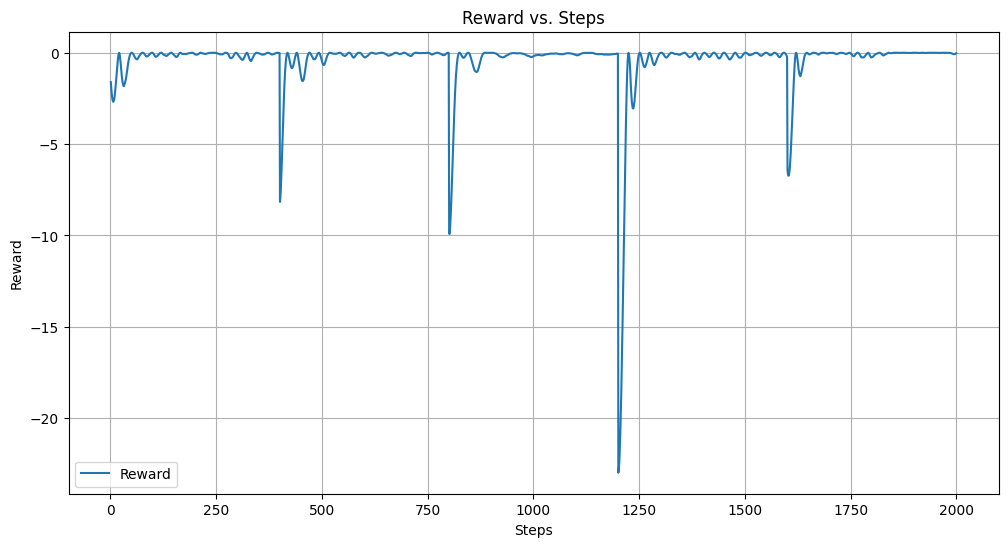

In [199]:
# Plotting reward vs steps
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['reward'], label='Reward')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward vs. Steps')
plt.legend()
plt.grid(True)
plt.show()

### Plot Set point curve

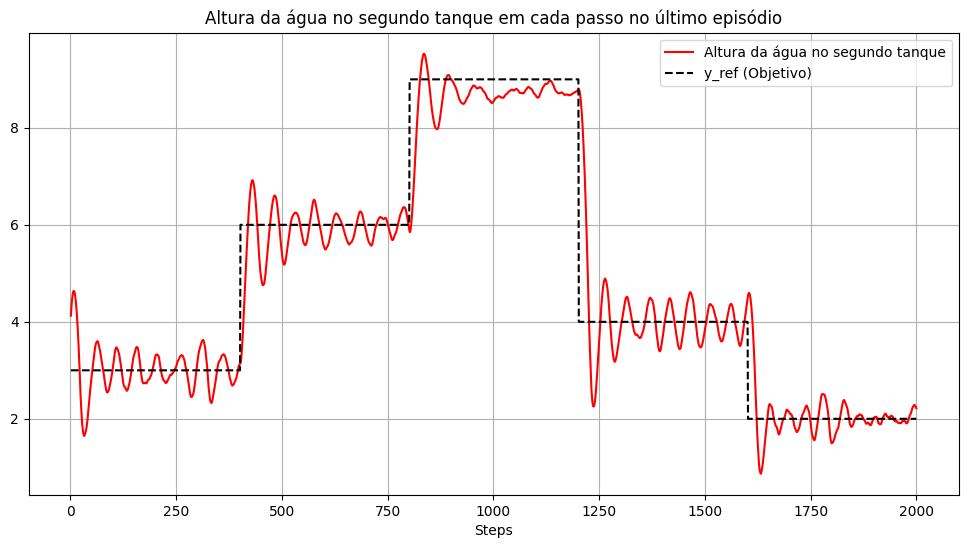

In [200]:
# Plot y_ref vs steps_in_episode
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df[tracked_point], label="Altura da água no segundo tanque", color='red')
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['y_ref'], '--', label='y_ref (Objetivo)', color='black')
plt.xlabel('Steps')
plt.ylabel('')
plt.title('Altura da água no segundo tanque em cada passo no último episódio')
plt.legend()
plt.grid(True)
plt.show()

### Ação do PPO durante o último episódio

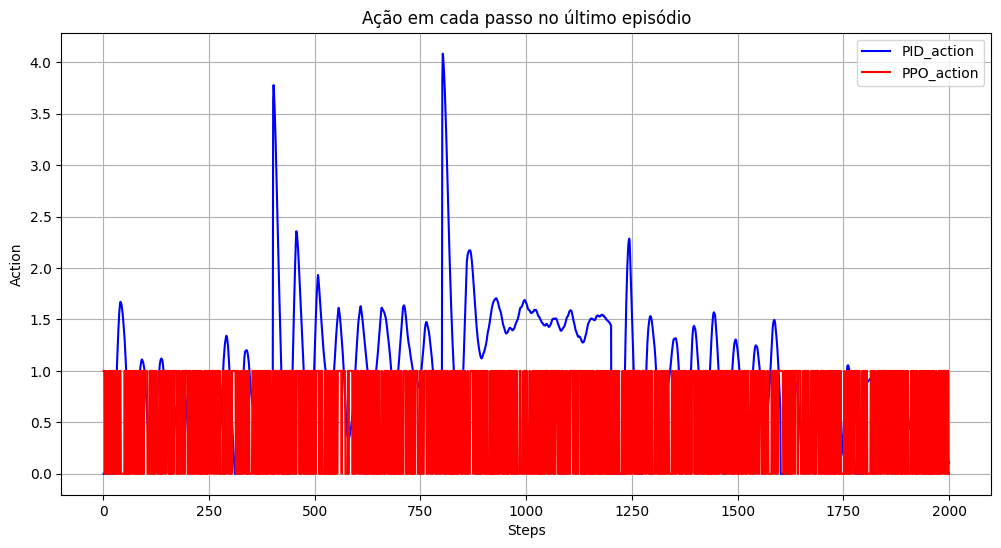

In [201]:
# Plotting action vs steps in the last episode
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['PID_action'], label='PID_action', color='blue')
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['PPO_action'], label='PPO_action', color='red')
# plt.plot(last_episode_df['steps_in_episode'], last_episode_df['action'], label='Action', color='black')
plt.xlabel('Steps')
plt.ylabel('Action')
plt.title('Ação em cada passo no último episódio')
plt.legend()
plt.grid(True)
plt.show()